In [1]:
# Import relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import time
import seaborn as sns


In [2]:
os.getcwd()

'C:\\Users\\robur\\Documents\\Thesis\\code\\lcfMapping\\markov'

In [3]:
# Read in excel files
pred2015 = pd.read_csv("../../data/output/wurChange/predictions-2015-median.csv")
pred2016 = pd.read_csv("../../data/output/wurChange/predictions-2016-median.csv")
pred2017 = pd.read_csv("../../data/output/wurChange/predictions-2017-median.csv")
pred2018 = pd.read_csv("../../data/output/wurChange/predictions-2018-median.csv")
classes = list(pred2015.columns)

pred2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,2.352941,68.235294,0.000000,29.411765,0.000000,0.0
1,25.327511,6.550218,68.122271,0.000000,0.000000,0.000000,0.0
2,3.947368,23.684211,59.210526,0.000000,0.000000,13.157895,0.0
3,0.000000,8.333333,6.666667,0.000000,75.000000,10.000000,0.0
4,12.987013,14.285714,72.727273,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
30484,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
30485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30487,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0


In [3]:
for i in range(len(classes)):
    print(classes[i])

NameError: name 'classes' is not defined

In [5]:
i=1; j=1
# i=6; j=2 #(100,50,15,3)
print("2015:", pred2015.iloc[i][j])
print("2016:", pred2016.iloc[i][j])
print("2017:", pred2017.iloc[i][j])
print("2018:", pred2018.iloc[i][j])

2015: 6.55021834061135
2016: 10.1694915254237
2017: 19.672131147541
2018: 20.0


In [ ]:
# Tryout energy of coocc

In [ ]:
# Energy = RF + Past + Future + Class1 + Class2 + ... + Class6

In [ ]:
# If positive coocc:
# EnergyClass1 = 0

# If negative coocc:
# abs(coocc) * (class*class)

In [4]:
# Read in IIASA Change data 
# Required to calculate cooccurence matrix
#test = gpd.read_file("../data/processed/IIASAchangeHarmonics.gpkg")
#df = pd.DataFrame(test.drop(columns='geometry'))
#df

df = pd.read_csv("../../data/processed/IIASAchangeMerged.csv")
df2015 = df.loc[df['reference_year'] == 2015]
df2016 = df.loc[df['reference_year'] == 2016]
df2017 = df.loc[df['reference_year'] == 2017]
df2018 = df.loc[df['reference_year'] == 2018]

df2015 = df2015[df2015.columns.intersection(classes)]
df2016 = df2016[df2015.columns.intersection(classes)]
df2017 = df2017[df2015.columns.intersection(classes)]
df2018 = df2018[df2015.columns.intersection(classes)]

df2015.iloc[0:10]

,bare,crops,grassland,shrub,tree,urban_built_up,water
0,0.0,0.0,9.0,50.0,41.0,0.0,0.0
4,27.0,63.0,4.0,0.0,0.0,6.0,0.0
8,0.0,0.0,0.0,0.0,100.0,0.0,0.0
12,1.0,0.0,93.0,0.0,6.0,0.0,0.0
16,0.0,0.0,41.0,0.0,59.0,0.0,0.0
20,0.0,0.0,77.0,1.0,21.0,1.0,0.0
24,0.0,23.0,66.0,0.0,11.0,0.0,0.0
28,0.0,31.0,10.0,7.0,52.0,0.0,0.0
32,0.0,0.0,0.0,75.0,25.0,0.0,0.0
36,0.0,0.0,4.0,0.0,19.0,77.0,0.0


In [5]:
# Calc coocc

binary = (df2015 > 0).astype(int)
coocc = binary.T.dot(binary)
binary[1:5]

,bare,crops,grassland,shrub,tree,urban_built_up,water
4,1,1,1,0,0,1,0
8,0,0,0,0,1,0,0
12,1,0,1,0,1,0,0
16,0,0,1,0,1,0,0


In [6]:
#rawnorm = df2015.apply(lambda x: (x - x.mean())/x.std())

rawnorm = binary.apply(lambda x: (x - x.mean())/x.std())
binary.min()
binary.mean()
rawnorm

,bare,crops,grassland,shrub,tree,urban_built_up,water
0,-0.433774,-0.512630,0.699134,0.999092,1.066083,-0.267304,-0.304738
4,2.305278,1.950666,0.699134,-1.000879,-0.937986,3.740945,-0.304738
8,-0.433774,-0.512630,-1.430298,-1.000879,1.066083,-0.267304,-0.304738
12,2.305278,-0.512630,0.699134,-1.000879,1.066083,-0.267304,-0.304738
16,-0.433774,-0.512630,0.699134,-1.000879,1.066083,-0.267304,-0.304738
...,...,...,...,...,...,...,...
134391,2.305278,1.950666,-1.430298,-1.000879,-0.937986,-0.267304,-0.304738
134395,-0.433774,-0.512630,0.699134,-1.000879,1.066083,-0.267304,-0.304738
134399,2.305278,-0.512630,0.699134,-1.000879,1.066083,-0.267304,-0.304738
134403,-0.433774,-0.512630,0.699134,-1.000879,1.066083,-0.267304,-0.304738


In [176]:
rawnorm.iloc[0,0]*rawnorm.iloc[0,0].T

0.1881601597269723

In [171]:
binary.T.dot(binary)

,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,5317,1223,3732,3008,2107,738,385
crops,1223,6987,2652,3224,2938,944,208
grassland,3732,2652,22551,13367,10451,1840,1098
shrub,3008,3224,13367,16802,9684,1613,623
tree,2107,2938,10451,9684,15714,1779,641
urban_built_up,738,944,1840,1613,1779,2239,154
water,385,208,1098,623,641,154,2853


In [7]:
coocc = rawnorm.T.dot(rawnorm)/(len(rawnorm)-1)
coocc

,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,1.000000,0.023411,0.027914,0.056639,-0.062388,0.125382,-0.019550
crops,0.023411,1.000000,-0.318889,-0.040005,-0.048847,0.140589,-0.101494
grassland,0.027914,-0.318889,1.000000,0.264033,-0.013193,0.085449,-0.186130
shrub,0.056639,-0.040005,0.264033,1.000000,0.217276,0.117596,-0.171924
tree,-0.062388,-0.048847,-0.013193,0.217276,1.000000,0.174915,-0.148631
urban_built_up,0.125382,0.140589,0.085449,0.117596,0.174915,1.000000,-0.015526
water,-0.019550,-0.101494,-0.186130,-0.171924,-0.148631,-0.015526,1.000000


<AxesSubplot:>

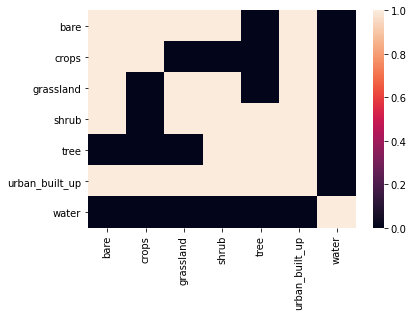

In [8]:
sns.heatmap(coocc > 0)

In [170]:
# Calc coocc

temp = (df2015 > 0).astype(int)
coocc = temp.T.dot(temp)
znorm = coocc.apply(lambda x: (x-x.mean())/x.std()).T
znorm


,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,1.665370,-0.639240,0.773136,0.365579,-0.141616,-0.912258,-1.110971
crops,-0.613135,1.959800,0.024742,0.280072,0.152407,-0.737675,-1.066211
grassland,-0.531502,-0.667403,1.836557,0.680903,0.313972,-0.769579,-0.862948
shrub,-0.611241,-0.577344,1.014393,1.553446,0.436421,-0.830158,-0.985518
tree,-0.709349,-0.564897,0.741085,0.607758,1.655951,-0.766365,-0.964183
urban_built_up,-0.803725,-0.523848,0.693482,0.385074,0.610606,1.235574,-1.597163
water,-0.497448,-0.686104,0.262504,-0.243775,-0.224590,-0.743660,2.133073


In [167]:
from scipy.stats import zscore
test = pd.DataFrame(zscore(binary))
test.T.dot(test)/len(df2015)

,0,1,2,3,4,5,6
0,1.000000,0.023411,0.027914,0.056639,-0.062388,0.125382,-0.019550
1,0.023411,1.000000,-0.318889,-0.040005,-0.048847,0.140589,-0.101494
2,0.027914,-0.318889,1.000000,0.264033,-0.013193,0.085449,-0.186130
3,0.056639,-0.040005,0.264033,1.000000,0.217276,0.117596,-0.171924
4,-0.062388,-0.048847,-0.013193,0.217276,1.000000,0.174915,-0.148631
5,0.125382,0.140589,0.085449,0.117596,0.174915,1.000000,-0.015526
6,-0.019550,-0.101494,-0.186130,-0.171924,-0.148631,-0.015526,1.000000


<AxesSubplot:>

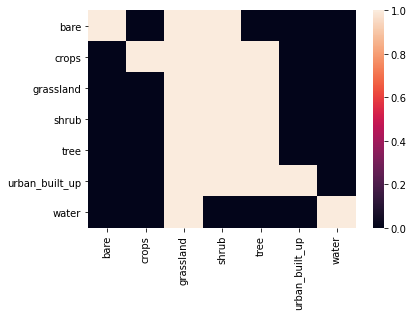

In [9]:
sns.heatmap(znorm > 0)

In [ ]:
# Try out implementation coocc in energy (without between-year)

In [24]:
i=2
j=1

# initialise
rf2015 = pred2015.iloc[i][j]
rf2016 = pred2016.iloc[i][j]
rf2017 = pred2017.iloc[i][j]
rf2018 = pred2018.iloc[i][j]
print("RF-values:")
print(" 2015:", rf2015)
print(" 2016:", rf2016)
print(" 2017:", rf2017)
print(" 2018:", rf2018)

node2015 = rf2015
node2016 = rf2016
node2017 = rf2017
node2018 = rf2018

nodeSim2015 = []
nodeSim2016 = []
nodeSim2017 = []
nodeSim2018 = []
nodeSim2015.append(node2015)
nodeSim2016.append(node2016)
nodeSim2017.append(node2017)
nodeSim2018.append(node2018)


eTotal = []
eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),
                                         (rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),
                                         (rf2018,node2017))))

e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),
                                         (rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),
                                         (rf2018,node2017)))




RF-values:
 2015: 23.6842105263158
 2016: 27.027027027027
 2017: 25.0
 2018: 27.027027027027


In [17]:
j = 5
node2015 = pred2015.iloc[i][j]
print("Class:", classes[j])
print(" Fraction:", node2015, "\n")

otherClasses = classes[:j] + classes[j+1:]
#print(pred2015.iloc[i,:][otherClasses])
corr = znorm.loc[classes[j],otherClasses]
#print(corr)

e_abs = abs(corr[corr < 0])
#print(e_abs)

neg_classes = list(e_abs.index.values)
#print(neg_classes)

e_class = [(e_abs[classname] * (node2015 * pred2015.iloc[i,:][classname])) for classname in neg_classes]
print("Energy of classes:", sum(e_class))

Class: bare
 Fraction: 13.1578947368421 

Energy of classes: 7.3553801957354015


In [149]:
print(pred2015.iloc[i,j])
print(pred2016.iloc[i,j])
print(pred2017.iloc[i,j])
print(pred2018.iloc[i,j])

13.1578947368421
8.10810810810811
15.9090909090909
0.0


In [103]:
print(classes)
otherClasses = classes[:j] + classes[j+1:]
print(otherClasses)

pred2015.iloc[i,:]#.columns.get_indexer(otherClasses)
pred2015.iloc[i,:][otherClasses]


['tree', 'shrub', 'grassland', 'crops', 'urban_built_up', 'bare', 'water']
['tree', 'grassland', 'crops', 'urban_built_up', 'bare', 'water']


tree               3.947368
grassland         59.210526
crops              0.000000
urban_built_up     0.000000
bare              13.157895
water              0.000000
Name: 2, dtype: float64

In [104]:
corr = znorm.loc[classes[j],otherClasses]
print(corr)

tree              0.313972
grassland         1.836557
crops            -0.667403
urban_built_up   -0.769579
bare             -0.531502
water            -0.862948
Name: grassland, dtype: float64


In [105]:
e_abs = abs(corr[corr < 0])
e_abs

crops             0.667403
urban_built_up    0.769579
bare              0.531502
water             0.862948
Name: grassland, dtype: float64

In [106]:
neg_classes = list(e_abs.index.values)
print(neg_classes)
pred2015.iloc[i,:][otherClasses][neg_classes]

['crops', 'urban_built_up', 'bare', 'water']


crops              0.000000
urban_built_up     0.000000
bare              13.157895
water              0.000000
Name: 2, dtype: float64

In [107]:
[(e_abs[classname] * (node2015 * pred2015.iloc[i,:][classname])) for classname in neg_classes]

[0.0, 0.0, 165.63441085545685, 0.0]

In [109]:
pred2015.iloc[i,:][neg_classes[2]]

13.1578947368421

In [117]:
10*13.16*0.532

70.0112

In [115]:
node2015

23.6842105263158

In [ ]:
## Start of Markov chain building

In [ ]:
## Pseudo-Code concept

# Concept of all code
"""
for 1:30.000 points
    
    for 1:7 classes:
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

# Concept of all code with params
"""
pred2015
pred2016
pred2017
pred2018

for 1:30.000 points (i):
    
    pred2015.iloc[i]
    pred2016.iloc[i]
    pred2017.iloc[i]
    pred2018.iloc[i]
    
    for 1:7 classes (j):
        pred2015.iloc[i][j]
        pred2016.iloc[i][j]
        pred2017.iloc[i][j]
        pred2018.iloc[i][j]
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

RF-values:
 2015: 6.55021834061135
 2016: 10.1694915254237
 2017: 19.672131147541
 2018: 20.0

After smoothing...
 Final node 2015: 9.55021834061135
 Final node 2016: 12.1694915254237
 Final node 2017: 16.672131147541
 Final node 2018: 18.0 



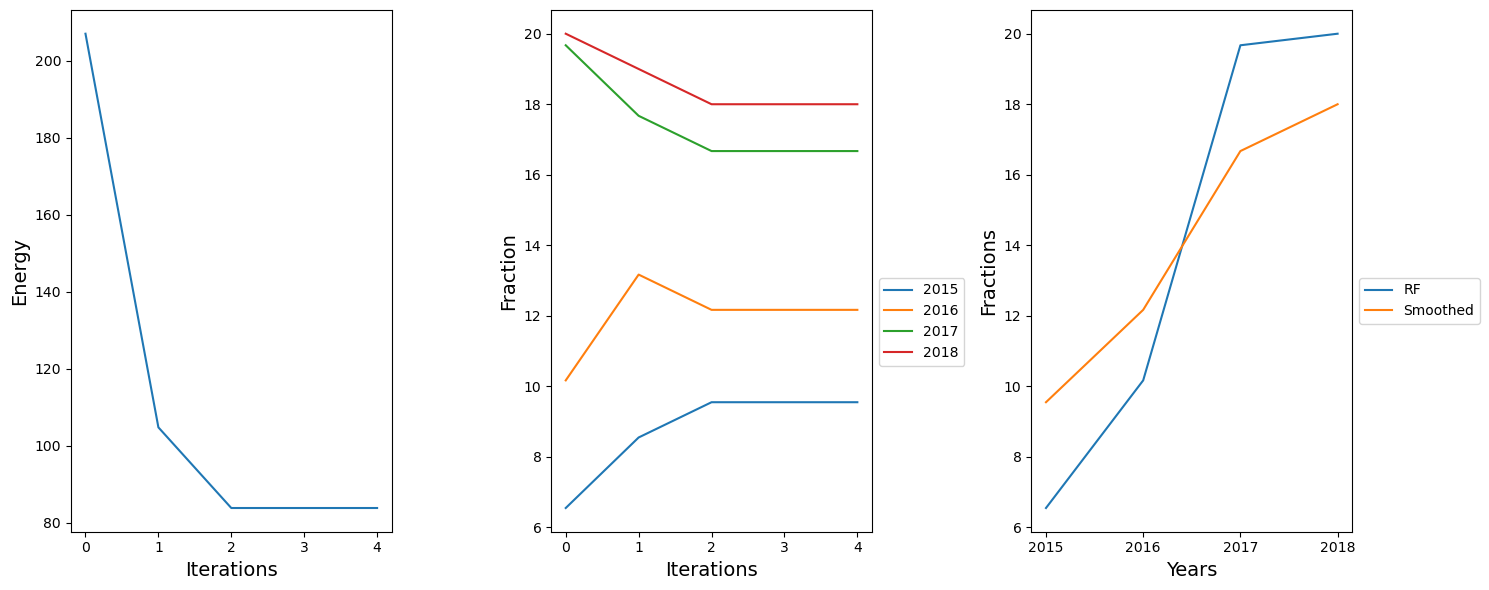

In [154]:
""" 
for 1:7 classes (j):
        pred2015.iloc[i][j]
        pred2016.iloc[i][j]
        pred2017.iloc[i][j]
        pred2018.iloc[i][j]
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

# for 1:7 classes (j):

i=1
j=1

# initialise
rf2015 = pred2015.iloc[i][j]
rf2016 = pred2016.iloc[i][j]
rf2017 = pred2017.iloc[i][j]
rf2018 = pred2018.iloc[i][j]
print("RF-values:")
print(" 2015:", rf2015)
print(" 2016:", rf2016)
print(" 2017:", rf2017)
print(" 2018:", rf2018)

node2015 = rf2015
node2016 = rf2016
node2017 = rf2017
node2018 = rf2018

stepsize = 1
plot = True

nodeSim2015 = []
nodeSim2016 = []
nodeSim2017 = []
nodeSim2018 = []
nodeSim2015.append(node2015)
nodeSim2016.append(node2016)
nodeSim2017.append(node2017)
nodeSim2018.append(node2018)

eTotal = []
eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),(rf2018,node2017))))
e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),(rf2018,node2017)))

for k in range(10):

#     if k == 2:
#         stepsize = 0.1
    
    if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
        break
    
    node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
    nodeSim2015.append(node2015)
    
    node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
    nodeSim2016.append(node2016)
    
    node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
    nodeSim2017.append(node2017)
    
    node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
    nodeSim2018.append(node2018)
    
    nodes = (node2015, node2016, node2017, node2018)
    edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
    e = calc_total_energy(nodes,edges)
    eTotal.append(e)
    

print("\nAfter smoothing...")

print(" Final node 2015:", node2015)
print(" Final node 2016:", node2016)
print(" Final node 2017:", node2017)
print(" Final node 2018:", node2018,"\n")

# print(" Node sim 2015:", [round(elem, 1) for elem in nodeSim2015])
# print(" Node sim 2016:", [round(elem, 1) for elem in nodeSim2016])
# print(" Node sim 2017:", [round(elem, 1) for elem in nodeSim2017])
# print(" Node sim 2018:", [round(elem, 1) for elem in nodeSim2018])
# print(" Energy sim", [round(elem, 1) for elem in eTotal])

if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)

In [9]:
# Set up
smooth2015 = []
smooth2016 = []
smooth2017 = []
smooth2018 = []
t0 = time.time() # timer

# Optimise all 30k points
for i in range(len(pred2015)):
#for i in range(1000):
    
    # List to save updated values in dictionary per class
    listofdicts = []

    # Optimise class by class
    for j in classes:

        # Locate basic RF-values
        rf2015 = pred2015.iloc[i][j]
        rf2016 = pred2016.iloc[i][j]
        rf2017 = pred2017.iloc[i][j]
        rf2018 = pred2018.iloc[i][j]

        # Intialise node's values
        node2015 = rf2015
        node2016 = rf2016
        node2017 = rf2017
        node2018 = rf2018

        # Stepsize to find optimal fraction
        stepsize = 1
        plot = False

        # Keep track of nodes over iterations (useful to check with plot=True)
        nodeSim2015 = []
        nodeSim2016 = []
        nodeSim2017 = []
        nodeSim2018 = []
        nodeSim2015.append(node2015)
        nodeSim2016.append(node2016)
        nodeSim2017.append(node2017)
        nodeSim2018.append(node2018)

        # Keep track of total energy over iterations (necessary) (useful to check with plot=True)
        eTotal = []
        eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),(rf2018,node2017))))
        e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),(rf2018,node2017)))


        # Iterations over one chain
        for k in range(10):

            # Stop if total energy remains stable 3 iterations in a row
            if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
                break

            # Optimise node's value of 2015
            node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
            nodeSim2015.append(node2015)

            # Optimise node's value of 2016
            node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
            nodeSim2016.append(node2016)

            # Optimise node's value of 2017
            node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
            nodeSim2017.append(node2017)

            # Optimise node's value of 2018
            node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
            nodeSim2018.append(node2018)

            # Calculate and store new total energy
            nodes = (node2015, node2016, node2017, node2018)
            edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
            e = calc_total_energy(nodes,edges)
            eTotal.append(e)


        # add class values to listofdicts
        dict1 = {"2015": node2015, "2016": node2016, "2017": node2017, "2018": node2018}
        listofdicts.append(dict1)

    # save per point updated values from listofdicts
    smooth2015.append([dict1["2015"] for dict1 in listofdicts])
    smooth2016.append([dict1["2016"] for dict1 in listofdicts])
    smooth2017.append([dict1["2017"] for dict1 in listofdicts])
    smooth2018.append([dict1["2018"] for dict1 in listofdicts])


# Timer
t1 = time.time()
print(round(t1 - t0, 1), "sec.")

# Lists to df
smooth2015 = pd.DataFrame(smooth2015, columns=classes)
smooth2016 = pd.DataFrame(smooth2016, columns=classes)
smooth2017 = pd.DataFrame(smooth2017, columns=classes)
smooth2018 = pd.DataFrame(smooth2018, columns=classes)

# Replace <0 and >100 values before normalisation
smooth2015[smooth2015 < 0] = 0
smooth2015[smooth2015 > 100] = 100
smooth2016[smooth2016 < 0] = 0
smooth2016[smooth2016 > 100] = 100
smooth2017[smooth2017 < 0] = 0
smooth2017[smooth2017 > 100] = 100
smooth2018[smooth2018 < 0] = 0
smooth2018[smooth2018 > 100] = 100

# Normalise all classes to add up to 100%
smooth2015 = smooth2015.div(smooth2015.sum(axis=1), axis=0) * 100
smooth2016 = smooth2016.div(smooth2016.sum(axis=1), axis=0) * 100
smooth2017 = smooth2017.div(smooth2017.sum(axis=1), axis=0) * 100
smooth2018 = smooth2018.div(smooth2018.sum(axis=1), axis=0) * 100

# Replace NaN values with 0 (NaN resulting from normalisation)
smooth2015 = smooth2015.replace(np.nan, 0)
smooth2016 = smooth2016.replace(np.nan, 0)
smooth2017 = smooth2017.replace(np.nan, 0)
smooth2018 = smooth2018.replace(np.nan, 0)

print("Done")

112.9 sec.
Done


In [48]:
# List to save updated values in dictionary per class

listofdicts = []
i=2
smooth2015 = []
smooth2016 = []
smooth2017 = []
smooth2018 = []

# Optimise class by class
for j in classes:
    print(j)
    # Locate basic RF-values
    rf2015 = pred2015.iloc[i][j]
    rf2016 = pred2016.iloc[i][j]
    rf2017 = pred2017.iloc[i][j]
    rf2018 = pred2018.iloc[i][j]

    # Intialise node's values
    node2015 = rf2015
    node2016 = rf2016
    node2017 = rf2017
    node2018 = rf2018

    # Stepsize to find optimal fraction
    stepsize = 1
    plot = False

    # Keep track of nodes over iterations (useful to check with plot=True)
    nodeSim2015 = []
    nodeSim2016 = []
    nodeSim2017 = []
    nodeSim2018 = []
    nodeSim2015.append(node2015)
    nodeSim2016.append(node2016)
    nodeSim2017.append(node2017)
    nodeSim2018.append(node2018)

    # Keep track of total energy over iterations (necessary) (useful to check with plot=True)
    eTotal = []
    eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                    edges = ((rf2015,node2016),
                                             (rf2016,node2015,node2017),
                                             (rf2017,node2016,node2018),
                                             (rf2018,node2017))))
    e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                    edges = ((rf2015,node2016),
                                             (rf2016,node2015,node2017),
                                             (rf2017,node2016,node2018),
                                             (rf2018,node2017)))


    # Iterations over one chain
    for k in range(10):

        # Stop if total energy remains stable 3 iterations in a row
        if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
            break

        # Optimise node's value of 2015
        node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
        nodeSim2015.append(node2015)

        # Optimise node's value of 2016
        node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
        nodeSim2016.append(node2016)

        # Optimise node's value of 2017
        node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
        nodeSim2017.append(node2017)

        # Optimise node's value of 2018
        node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
        nodeSim2018.append(node2018)

        # Calculate and store new total energy
        nodes = (node2015, node2016, node2017, node2018)
        edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
        e = calc_total_energy(nodes,edges)
        eTotal.append(e)


    # add class values to listofdicts
    dict1 = {"2015": node2015, "2016": node2016, "2017": node2017, "2018": node2018}
    listofdicts.append(dict1)

# save per point updated values from listofdicts
smooth2015.append([dict1["2015"] for dict1 in listofdicts])
smooth2016.append([dict1["2016"] for dict1 in listofdicts])
smooth2017.append([dict1["2017"] for dict1 in listofdicts])
smooth2018.append([dict1["2018"] for dict1 in listofdicts])

tree
shrub
grassland
crops
urban_built_up
bare
water


RF-values:
      tree     shrub  grassland       crops  urban_built_up  bare  water
2015   0.0  0.000000  12.244898   87.755102             0.0   0.0    0.0
2016   0.0  1.515152  98.484848    0.000000             0.0   0.0    0.0
2017   0.0  0.000000  56.976744   43.023256             0.0   0.0    0.0
2018   0.0  0.000000   0.000000  100.000000             0.0   0.0    0.0

New values:
      tree     shrub  grassland      crops  urban_built_up  bare  water
2015   0.0  0.000000  36.244898  63.755102             0.0   0.0    0.0
2016   0.0  0.515152  60.484848  39.000000             0.0   0.0    0.0
2017   0.0  0.000000  46.976744  53.023256             0.0   0.0    0.0
2018   0.0  0.000000  23.000000  77.000000             0.0   0.0    0.0


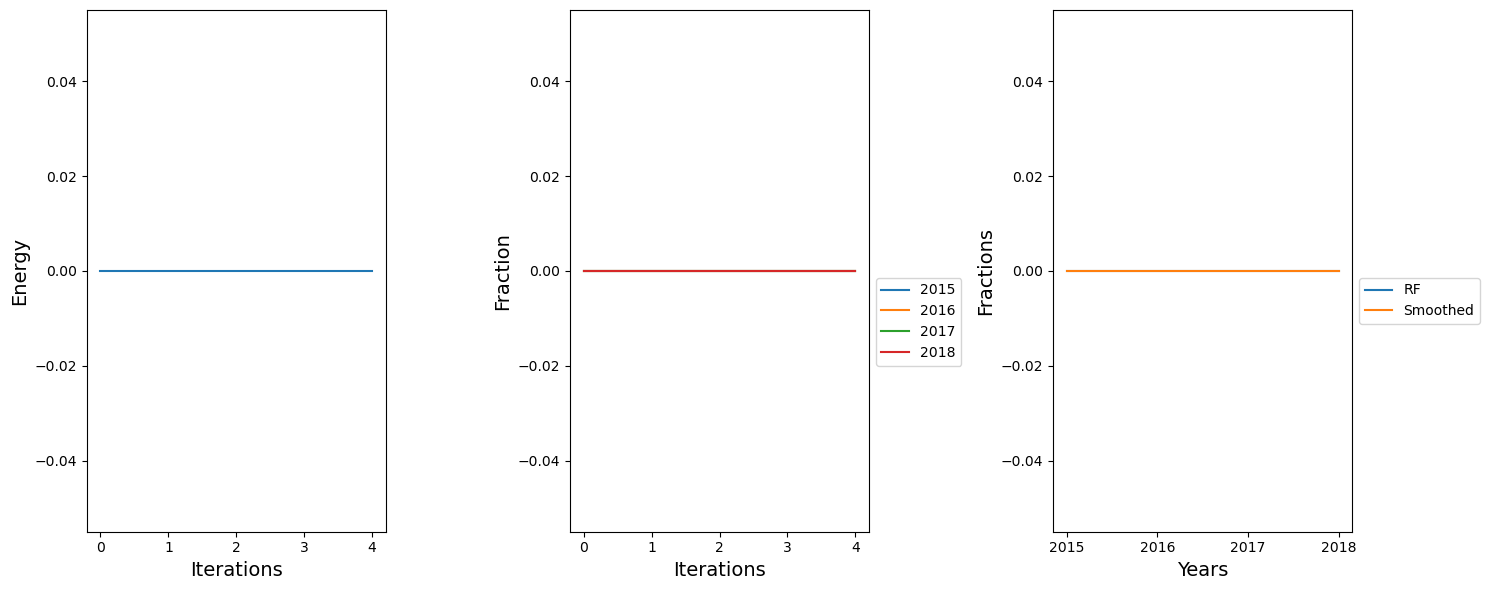

In [146]:
# Save RF in DF, and then replace RF with Node after each class is optimised

i=30488

point_data = pd.DataFrame([pred2015.iloc[i],pred2016.iloc[i],pred2017.iloc[i],pred2018.iloc[i]], 
                          index=[2015, 2016, 2017, 2018])
print("RF-values:")
print(point_data.to_string())
#      tree shrub grass crops ... 
# 2015
# 2016
# 2017
# 2018

# for j in classes:...
#j=1
for j in range(len(classes)):
    
    #initialise
    rf2015 = point_data[classes[j]].iloc[0]
    rf2016 = point_data[classes[j]].iloc[1]
    rf2017 = point_data[classes[j]].iloc[2]
    rf2018 = point_data[classes[j]].iloc[3]

    
    node2015 = rf2015
    node2016 = rf2016
    node2017 = rf2017
    node2018 = rf2018

    # Stepsize to find optimal fraction
    stepsize = 1
    plot = True

    # Keep track of nodes over iterations (useful to check with plot=True)
    nodeSim2015 = []
    nodeSim2016 = []
    nodeSim2017 = []
    nodeSim2018 = []
    nodeSim2015.append(node2015)
    nodeSim2016.append(node2016)
    nodeSim2017.append(node2017)
    nodeSim2018.append(node2018)

    # Within-year classes
    otherClasses = classes[:j] + classes[j+1:]
    #print("\nOther classes:", otherClasses)
    other2015 = point_data.loc[2015,otherClasses]
    other2016 = point_data.loc[2016,otherClasses]
    other2017 = point_data.loc[2017,otherClasses]
    other2018 = point_data.loc[2018,otherClasses]

    eTotal = []
    eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                    edges = ((rf2015,node2016),
                                             (rf2016,node2015,node2017),
                                             (rf2017,node2016,node2018),
                                             (rf2018,node2017)),
                                    edges_within = (other2015,other2016,other2017,other2018)))

    e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                          edges = ((rf2015,node2016),
                                   (rf2016,node2015,node2017),
                                   (rf2017,node2016,node2018),
                                   (rf2018,node2017)),
                          edges_within = (other2015,other2016,other2017,other2018))
    #print(e) # now edges_wihtin implemented in calc_energy and calc_total_energy
    # todo: implement in optimise_node and minimise_node -> done


    # Iterations over one chain
    for k in range(10):

        # Stop if total energy remains stable 3 iterations in a row
        if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
            break

        # Optimise node's value of 2015
        node2015 = optimise_node(node2015, edges=(rf2015,node2016), edges_within=other2015, stepsize=stepsize)
        nodeSim2015.append(node2015)

        # Optimise node's value of 2016
        node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), edges_within=other2016, stepsize=stepsize)
        nodeSim2016.append(node2016)

        # Optimise node's value of 2017
        node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), edges_within=other2017, stepsize=stepsize)
        nodeSim2017.append(node2017)

        # Optimise node's value of 2018
        node2018 = optimise_node(node2018, edges=(rf2018,node2017), edges_within=other2018, stepsize=stepsize)
        nodeSim2018.append(node2018)

        # Calculate and store new total energy
        nodes = (node2015, node2016, node2017, node2018)
        edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
        e = calc_total_energy(nodes,edges,(other2015,other2016,other2017,other2018))
        eTotal.append(e)

    # print(" Final node 2015:", node2015)
    # print(" Final node 2016:", node2016)
    # print(" Final node 2017:", node2017)
    # print(" Final node 2018:", node2018,"\n")

    # update point_data with optimised nodes
    point_data[classes[j]].iloc[0] = node2015
    point_data[classes[j]].iloc[1] = node2016
    point_data[classes[j]].iloc[2] = node2017
    point_data[classes[j]].iloc[3] = node2018

print("\nNew values:")
print(point_data.to_string())

# Now done for one class
# TODO: make it applicable for all classes of this point
if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)

In [50]:
point_data = pd.DataFrame([pred2015.iloc[i],pred2016.iloc[i],pred2017.iloc[i],pred2018.iloc[i]], 
                          index=[2015, 2016, 2017, 2018])
point_data

,tree,shrub,grassland,crops,urban_built_up,bare,water
2015,25.327511,6.550218,68.122271,0.0,0.0,0.0,0.0
2016,30.508475,10.169492,59.322034,0.0,0.0,0.0,0.0
2017,34.426230,19.672131,45.901639,0.0,0.0,0.0,0.0
2018,26.000000,20.000000,54.000000,0.0,0.0,0.0,0.0


In [133]:
nodeSim2018

[27.027027027027,
 26.027027027027,
 26.027027027027,
 26.027027027027,
 26.027027027027]

In [69]:
# Get other classes from point_data
j = 0
other2015 = classes[:j] + classes[j+1:]
print(other2015)

print(point_data.loc[2015].iloc[j])

edges_within = point_data.loc[2015,other2015]
print(edges_within)

['shrub', 'grassland', 'crops', 'urban_built_up', 'bare', 'water']
25.3275109170306
shrub              6.550218
grassland         68.122271
crops              0.000000
urban_built_up     0.000000
bare               0.000000
water              0.000000
Name: 2015, dtype: float64


In [30]:
print(point_data.iloc[:,0])
print(point_data.iloc[:,0].iloc[1])
print(point_data["tree"])

2015    25.327511
2016    30.508475
2017    34.426230
2018    26.000000
Name: tree, dtype: float64
30.5084745762712
2015    25.327511
2016    30.508475
2017    34.426230
2018    26.000000
Name: tree, dtype: float64


In [47]:
listofdicts

NameError: name 'listofdicts' is not defined

In [40]:
# for k in range(len(listofdicts)):
#     #print(k)
#     print(list(listofdicts[k].values())[0])
    
[list(listofdicts[k].values())[0] for k in range(len(listofdicts))]

[6.94736842105263,
 24.6842105263158,
 56.2105263157895,
 0.0,
 0.0,
 11.1578947368421,
 0.0]

In [182]:
list(listofdicts[0].values())[0]

6.94736842105263

In [160]:
pd.DataFrame([pred2015.iloc[i],pred2016.iloc[i],pred2017.iloc[i],pred2018.iloc[i]])

,tree,shrub,grassland,crops,urban_built_up,bare,water
2,3.947368,23.684211,59.210526,0.0,0.0,13.157895,0.0
2,10.810811,27.027027,54.054054,0.0,0.0,8.108108,0.0
2,11.363636,25.000000,47.727273,0.0,0.0,15.909091,0.0
2,16.216216,27.027027,56.756757,0.0,0.0,0.000000,0.0


In [173]:
smooth2015 = pd.DataFrame(smooth2015, columns=classes)
smooth2016 = pd.DataFrame(smooth2016, columns=classes)
smooth2017 = pd.DataFrame(smooth2017, columns=classes)
smooth2018 = pd.DataFrame(smooth2018, columns=classes)
pd.concat([smooth2015,smooth2016,smooth2017,smooth2018],ignore_index=True)

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,6.947368,24.684211,56.210526,0.0,0.0,11.157895,0.0
1,9.810811,26.027027,54.054054,0.0,0.0,10.108108,0.0
2,11.363636,26.000000,51.727273,0.0,0.0,9.909091,0.0
3,14.216216,26.027027,53.756757,0.0,0.0,5.000000,0.0


In [31]:
smooth2015.to_csv("../../data/output/markov/smooth2015-basic.csv",index=False)
smooth2016.to_csv("../../data/output/markov/smooth2016-basic.csv",index=False)
smooth2017.to_csv("../../data/output/markov/smooth2017-basic.csv",index=False)
smooth2018.to_csv("../../data/output/markov/smooth2018-basic.csv",index=False)

In [143]:
# optimise_node

def optimise_node(node, edges, edges_within, stepsize=5):

    # describe edges
    # 2 edges: rf2015 + node2016
    e = calc_energy(node, edges, edges_within)
    
    # Create empty list to keep track of energy
    eSim = []
    eSim.append(e)
    #print("Initial Energy:", eSim[0])

    #print("Start simulation...")
    node = minimise_energy(node, edges, edges_within, eSim, stepsize)
    #print("New node:", node)
    #print("Energy:", eSim)
    
    
    return node

In [51]:
print(j)
otherClassesIndex = list(range(len(classes)))[:j] + list(range(len(classes)))[j+1:]
print(otherClassesIndex)

allFractions = [list(listofdicts[k].values())[j] for k in range(len(listofdicts))]
print(allFractions)
otherFractions = [allFractions[l] for l in otherClassesIndex]
print(otherFractions)

otherClasses = classes[:j] + classes[j+1:]
print(pred2015.iloc[i,:][otherClassesIndex])
corr = znorm.loc[classes[j],otherClasses]
print(corr)
e_abs = abs(corr[corr < 0])
print(e_abs)

edge1 = edges[0]
edge2 = edges[1]

e1 = (node - edge1)**2
e2 = (node - edge2)**2

if len(edges) == 3:
    edge3 = edges[2]
    e3 = (node - edge3)**2
    e1 + e2 + e3

e1 + e2

1
[0, 2, 3, 4, 5, 6]
[9.8108108108108, 26.027027027027, 54.0540540540541, 0.0, 0.0, 10.10810810810811, 0.0]
[9.8108108108108, 54.0540540540541, 0.0, 0.0, 10.10810810810811, 0.0]
tree              25.327511
grassland         68.122271
crops              0.000000
urban_built_up     0.000000
bare               0.000000
water              0.000000
Name: 1, dtype: float64
tree              0.436421
grassland         1.014393
crops            -0.577344
urban_built_up   -0.830158
bare             -0.611241
water            -0.985518
Name: shrub, dtype: float64
crops             0.577344
urban_built_up    0.830158
bare              0.611241
water             0.985518
Name: shrub, dtype: float64


NameError: name 'node' is not defined

In [68]:
otherClasses = classes[:j] + classes[j+1:]
print(otherClasses)
print(pred2015.iloc[i,:][otherClasses])
corr = znorm.loc[classes[j],otherClasses]
#print(corr)

e_abs = abs(corr[corr < 0])
#print(e_abs)

neg_classes = list(e_abs.index.values)
#print(neg_classes)

e_class = [(e_abs[classname] * (node2015 * pred2015.iloc[i,:][classname])) for classname in neg_classes]
print("Energy of classes:", sum(e_class))

['tree', 'grassland', 'crops', 'urban_built_up', 'bare', 'water']
tree               3.947368
grassland         59.210526
crops              0.000000
urban_built_up     0.000000
bare              13.157895
water              0.000000
Name: 2, dtype: float64
Energy of classes: 190.48362881456987


In [81]:
corr = znorm.loc[classes[j]]
corr

bare             -0.709349
crops            -0.564897
grassland         0.741085
shrub             0.607758
tree              1.655951
urban_built_up   -0.766365
water            -0.964183
Name: tree, dtype: float64

In [82]:
point_data


,tree,shrub,grassland,crops,urban_built_up,bare,water
2015,25.327511,6.550218,68.122271,0.0,0.0,0.0,0.0
2016,30.508475,10.169492,59.322034,0.0,0.0,0.0,0.0
2017,34.426230,19.672131,45.901639,0.0,0.0,0.0,0.0
2018,26.000000,20.000000,54.000000,0.0,0.0,0.0,0.0


In [115]:
# New calc energy 

edges_within = (other2015,other2016,other2017,other2018)
print(edges_within[0])
#print(edges_within[0])

for classname in neg_classes:
    print(classname)
    print(edges_within[0][classname])

shrub              6.550218
grassland         68.122271
crops              0.000000
urban_built_up     0.000000
bare               0.000000
water              0.000000
Name: 2015, dtype: float64
crops
0.0
urban_built_up
0.0
bare
0.0
water
0.0


In [83]:
znorm

,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,1.665370,-0.639240,0.773136,0.365579,-0.141616,-0.912258,-1.110971
crops,-0.613135,1.959800,0.024742,0.280072,0.152407,-0.737675,-1.066211
grassland,-0.531502,-0.667403,1.836557,0.680903,0.313972,-0.769579,-0.862948
shrub,-0.611241,-0.577344,1.014393,1.553446,0.436421,-0.830158,-0.985518
tree,-0.709349,-0.564897,0.741085,0.607758,1.655951,-0.766365,-0.964183
urban_built_up,-0.803725,-0.523848,0.693482,0.385074,0.610606,1.235574,-1.597163
water,-0.497448,-0.686104,0.262504,-0.243775,-0.224590,-0.743660,2.133073


In [95]:
corr = znorm.loc[classes[j]][list(edges_within[0].index.values)]
e_abs = abs(corr[corr < 0])
print(e_abs)


crops             0.564897
urban_built_up    0.766365
bare              0.709349
water             0.964183
Name: tree, dtype: float64


In [104]:
neg_classes = list(e_abs.index.values)

e_class = [(e_abs[classname] * (node2015 * edges_within[][classname])) for classname in neg_classes]
e_class

0.7093490861685815


[0.0, 0.0, 0.0, 0.0]

In [144]:
def calc_energy(node, edges, edges_within):
    
    # New below
    # Gather co-occurence correlations of other classes
    corr = znorm.loc[classes[j]][list(edges_within.index.values)]

    # Only penalise the negative correlations, and take the absolute value
    e_abs = abs(corr[corr < 0])
    neg_classes = list(e_abs.index.values)

    # Compute energy of all classes
    # sum(abs(corr)*(node*class))
    e_coocc = sum([(e_abs[classname] * (node2015 * edges_within[classname])) for classname in neg_classes])

    # Old below
    edge1 = edges[0]
    edge2 = edges[1]
    
    e1 = (node - edge1)**2
    e2 = (node - edge2)**2
    
    if len(edges) == 3:
        edge3 = edges[2]
        e3 = (node - edge3)**2
        return e1 + e2 + e_coocc + e3
    
    return e1 + e2 + e_coocc


def calc_total_energy(nodes, edges, edges_within):
    
    node2015 = nodes[0]
    node2016 = nodes[1]
    node2017 = nodes[2]
    node2018 = nodes[3]
    
    edges2015 = edges[0]
    edges2016 = edges[1]
    edges2017 = edges[2]
    edges2018 = edges[3]
    
    edges_within2015 = edges_within[0]
    edges_within2016 = edges_within[1]
    edges_within2017 = edges_within[2]
    edges_within2018 = edges_within[3]
    
    e2015 = calc_energy(node2015, edges2015, edges_within2015)
    e2016 = calc_energy(node2016, edges2016, edges_within2016)
    e2017 = calc_energy(node2017, edges2017, edges_within2017)
    e2018 = calc_energy(node2018, edges2018, edges_within2018)
    
    return e2015 + e2016 + e2017 + e2018
    
    
def minimise_energy(node, edges, edges_within, eSim, stepsize):
    
    i = 0
    #print(i)
    
    if calc_energy(node + stepsize, edges, edges_within) < eSim[i]:
        node = node + stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node + stepsize, edges, edges_within) < eSim[i]:
            node = node + stepsize
            i += 1
            eSim.append(calc_energy(node,edges, edges_within))
        
    elif calc_energy(node - stepsize, edges, edges_within) < eSim[i]:
        node = node - stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node - stepsize, edges, edges_within) < eSim[i]:
            node = node - stepsize
            i += 1
            eSim.append(calc_energy(node, edges, edges_within))
    
    return node


In [42]:
def calc_energy(node, edges):
    
    edge1 = edges[0]
    edge2 = edges[1]
    
    e1 = (node - edge1)**2
    e2 = (node - edge2)**2
    
    if len(edges) == 3:
        edge3 = edges[2]
        e3 = (node - edge3)**2
        return e1 + e2 + e3
    
    return e1 + e2


def minimise_energy(node, edges, edges_within, eSim, stepsize):
    
    i = 0
    #print(i)
    
    if calc_energy(node + stepsize, edges, edges_within) < eSim[i]:
        node = node + stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node + stepsize, edges, edges_within) < eSim[i]:
            node = node + stepsize
            i += 1
            eSim.append(calc_energy(node,edges, edges_within))
        
    elif calc_energy(node - stepsize, edges, edges_within) < eSim[i]:
        node = node - stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node - stepsize, edges, edges_within) < eSim[i]:
            node = node - stepsize
            i += 1
            eSim.append(calc_energy(node, edges, edges_within))
    
    return node


def calc_total_energy(nodes, edges):
    
    node2015 = nodes[0]
    node2016 = nodes[1]
    node2017 = nodes[2]
    node2018 = nodes[3]
    edges2015 = edges[0]
    edges2016 = edges[1]
    edges2017 = edges[2]
    edges2018 = edges[3]
    
    e2015 = calc_energy(node2015, edges2015)
    e2016 = calc_energy(node2016, edges2016)
    e2017 = calc_energy(node2017, edges2017)
    e2018 = calc_energy(node2018, edges2018)
    
    return e2015 + e2016 + e2017 + e2018
    

In [43]:
def plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018):

    # Plot energy over iterations
    xs = [x for x in range(len(eTotal))]
    plt.figure(figsize=(15,6), dpi= 100)
    plt.subplot(1, 3, 1)
    plt.plot(xs, eTotal)
    plt.ylabel('Energy', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)

    # Plot nodes over iterations
    xs = [x for x in range(len(nodeSim2015))]
    plt.subplot(1, 3, 2)
    plt.plot(xs, nodeSim2015)
    plt.plot(xs, nodeSim2016)
    plt.plot(xs, nodeSim2017)
    plt.plot(xs, nodeSim2018)
    plt.ylabel('Fraction', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)
    plt.legend(["2015","2016","2017","2018"], loc="upper left", bbox_to_anchor=(1, 0.5))

    xs = ["2015","2016","2017","2018"]
    yRF = [rf2015,rf2016,rf2017,rf2018]
    yNode = [node2015,node2016,node2017,node2018]
    plt.subplot(1, 3, 3)
    plt.plot(xs, yRF)
    plt.plot(xs, yNode)
    plt.ylabel('Fractions', fontsize=14)
    plt.xlabel('Years', fontsize=14)
    plt.legend(["RF","Smoothed"], loc="upper left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()